## Implementing of the Gaussian Naive Bayes for Binary Classification Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from PIL import Image

In [2]:
dataset=make_classification(n_samples=1000,n_features=4)

In [3]:
X=dataset[0]
y=dataset[1]

In [4]:
sc= StandardScaler()
X=sc.fit_transform(X)

Text(0.5, 1.0, 'Classified All Data')

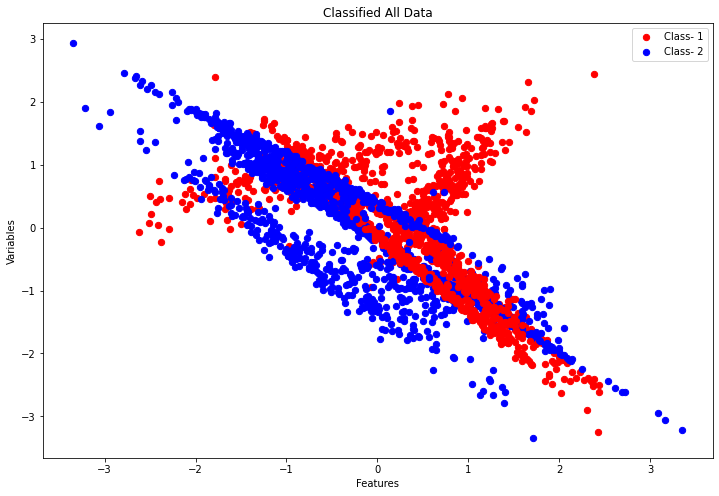

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 40, c = 'red', label = 'Class- 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 40, c = 'blue', label = 'Class- 2')

plt.scatter(X[y == 0, 1], X[y == 0, 2], s = 40, c = 'red')
plt.scatter(X[y == 1, 1], X[y == 1, 2], s = 40, c = 'blue')

plt.scatter(X[y == 0, 2], X[y == 0, 3], s = 40, c = 'red')
plt.scatter(X[y == 1, 2], X[y == 1, 3], s = 40, c = 'blue')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('Classified All Data')

Text(0.5, 1.0, 'Unclassified All Data')

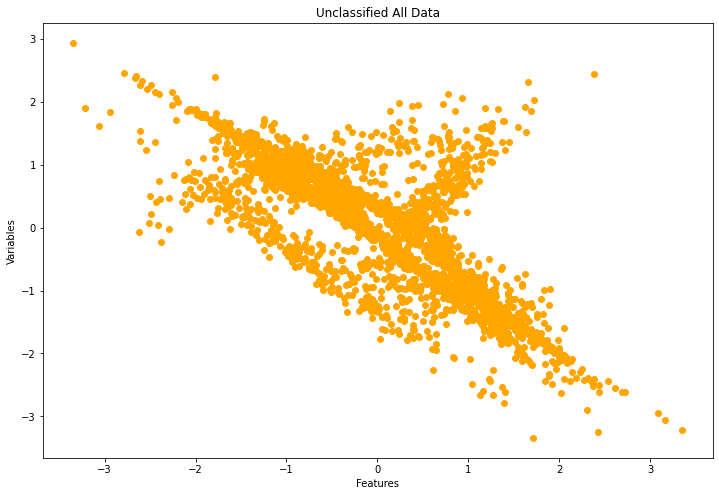

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c='orange')
plt.scatter(X[:,1],X[:,2],c='orange')
plt.scatter(X[:,2],X[:,3],c='orange')
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('Unclassified All Data')

[Text(0.5, 1.0, 'Distribution of the last column of the X')]

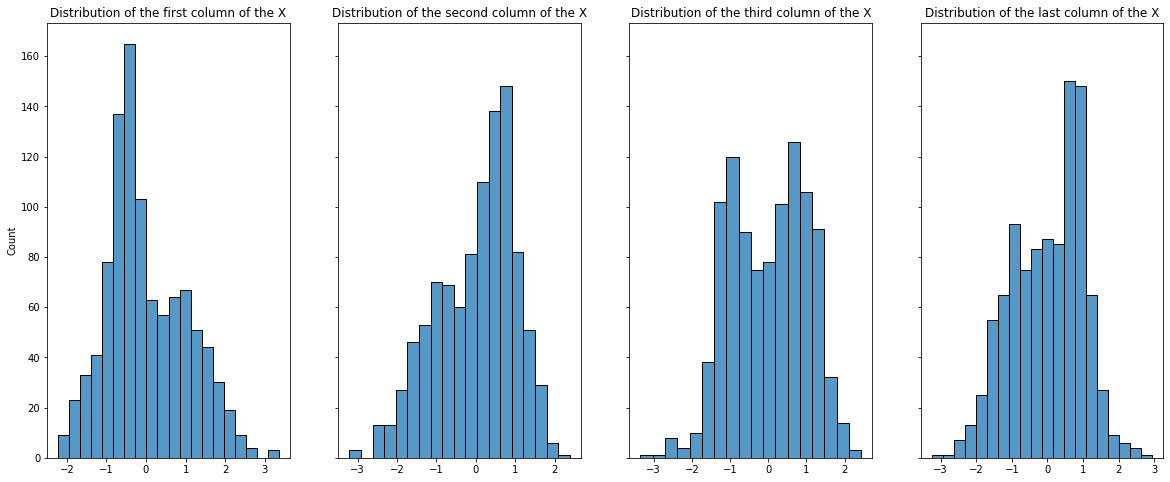

In [7]:
fig, axes= plt.subplots(1, 4, sharey=True,figsize=(20,8))
sns.histplot(ax=axes[0],x=X[:,0]).set(title='Distribution of the first column of the X')
sns.histplot(ax=axes[1],x=X[:,1]).set(title='Distribution of the second column of the X')
sns.histplot(ax=axes[2],x=X[:,2]).set(title='Distribution of the third column of the X')
sns.histplot(ax=axes[3],x=X[:,3]).set(title='Distribution of the last column of the X')

#### Description of the Gaussian Naive Bayes Classifier 

* **#1** **column_stats()** : It returns statistics of each column of the training dataset.

    According to the working principle of the model, **the mean**, **standard deviation** and **number of elements in each column of train dataset** (except last column) are done in **stats.append()**. 

    **The reason** for taking the total number of elements in the columns is to be able to calculate the probability in the next stages, since the model gives results according to purely **probabilistic distributions**.
    
    **stats.pop()** is called because the last column of the training dataset contains actual binary values (y_train) .
    
* **#2** **label_stats()** : It returns statistics of each label of the training dataset.
    
    First, the training dataset is **separated by labels**. The separated data is stored in a **dict()** data structure called **separated**. 
    
    In the next step, the **column_stats()** method runs for the necessary columns statistics based on the labels of the **separated** dict object.. It is stored in a **dict()** data structure called **stats.**
    
* **#3** **gauss_density()** : It is a **gaussian density function** based on the working principle of the gaussian naive bayes algorithm.

* **#4** **fit()** : The **label_stats()** method returns the **stats object**.

* **#5** **calculate_label_probs()** : Calculates **gaussian probability** for each element in each row of X_test.

    The number of elements in the columns stored in the **stats object** returned in the **fit()** method is assigned to **count**. With **count/total_count**, the probability of each label is calculated separately. 
    
    In the last loop, iterations are done as many as the number of columns, namely **len(c_stats)**. The standard deviation and mean in the column are calculated according to the index in the iteration. 
    
    All elements found in the entered row (**rows of X_test**) are multiplied one by one by the **gauss_density()** method. 
    
    The returned value is the **probabilities of the elements in a single row separated by labels**.
    
* **#6** **make_predict()** : The **calculate_label_probs()** method runs. The **probabilities results of the labels** are compared and the **higher one** is returned.

* **#7** **predict()** : It stores it in the **numpy array** data structure by applying the methods mentioned in the previous stages to **each row of X_test** via list comprehension.

    
    

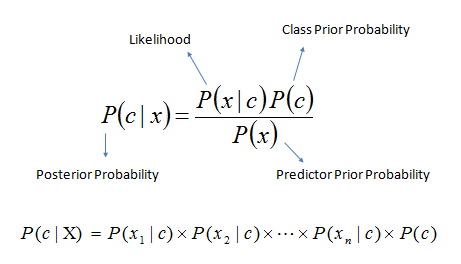

In [8]:
Image.open('Figures/bayes.png')

**Naive Bayes Algorithm**

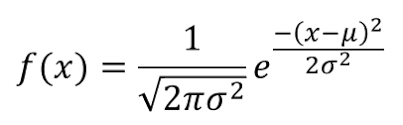

In [9]:
Image.open('Figures/gauss.png')

**Gauss Density Function**

* μ : mean 
* σ : standard deviation

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [11]:
class GaussianNB_mine():
    
    """
    
    Gaussian Naive Bayes (GaussianNB).
    
    
    Hyperparameters::
    
        stats : dict, default=None
        To view the required statistics of the features.
        
    Attributes::
    
        total_count : float,default=None
    
    
    """
    
    
    
    def __init__(self,stats=None):
        
        self.stats=stats
        self.total_count=None
        
    
    def column_stats(self,data):
        
        stats=[]
        
        for k in range(data.shape[1]):
            column=data[:,k]
            stats.append((np.mean(column), np.std(column), column.shape[0]))
    
        stats.pop() 
    
        return stats 
    
    
    def label_stats(self,X,y):
        
        data=np.c_[X,y]
        labels=np.unique(y)
        
        separated=dict()
        stats = dict()
        
        for label in labels:
            separated[label]=data[data[:,-1]==label]
  
        for label, column in separated.items():
            stats[label] = self.column_stats(column)
            
        self.total_count=X.shape[0]
        
        return stats
    
    
    def gauss_density(self,X, mean, std):
    
        exp = np.exp(-((X-mean)**2 / (2. * std**2 )))
        return (1. / (np.sqrt(2. * np.pi) * std)) * exp
    
    
    
    def calculate_label_probs(self,stats, row):
        
        probs = dict()
    
        for label, c_stats in stats.items():
            
            count=c_stats[0][2]
            probs[label] = count/self.total_count
            
            for j in range(len(c_stats)):
                
                mean, std,_= c_stats[j]
                probs[label] *= self.gauss_density(row[j], mean, std)
            
        return probs
    
    def fit(self,X,y):
        
        self.stats=self.label_stats(X,y)
    
    
    def make_predict(self,stats,row):

        probs = self.calculate_label_probs(stats, row)
        best_label= None
        best_prob=float('-inf')
        
        for label, prob in probs.items():
            
            if ( best_label==None ) or ( prob > best_prob ) :
                
                best_prob = prob
                best_label =label
            
        return best_label
    
    
    
    def predict(self,X):
        
        return np.array([self.make_predict(self.stats,x) for x in X])


#### Hand-made Results

In [12]:
from sklearn.metrics import accuracy_score,jaccard_score,confusion_matrix,f1_score

In [13]:
model=GaussianNB_mine()

In [14]:
%time model.fit(X_train,y_train)

CPU times: user 3.08 ms, sys: 1.18 ms, total: 4.26 ms
Wall time: 3.03 ms


In [15]:
yhat_mine=model.predict(X_test)

In [16]:
accuracy_score(y_test,yhat_mine)

0.8757575757575757

In [17]:
jaccard_score(y_test,yhat_mine)

0.7722222222222223

In [18]:
f1_score(y_test,yhat_mine)

0.871473354231975

In [19]:
cm_mine=confusion_matrix(y_test,yhat_mine)

#### Plots Hand-made

Text(0.5, 1.0, 'Confusion Matrix Hand-made')

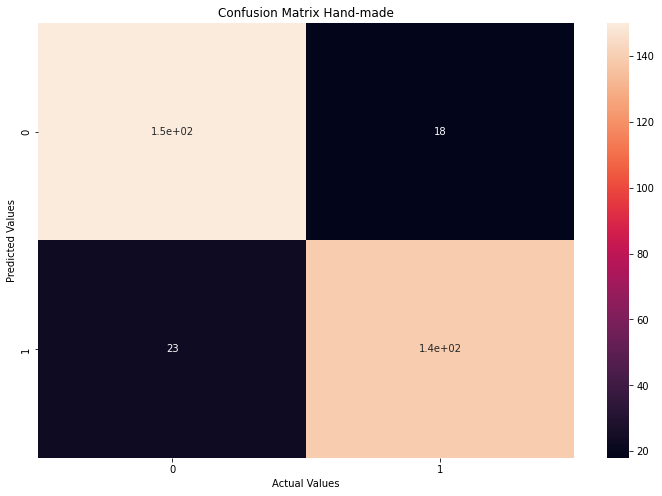

In [20]:
fig=plt.figure(figsize=(12,8))
fig=sns.heatmap(cm_mine,annot=True)
fig.set(xlabel='Actual Values', ylabel='Predicted Values')
plt.title('Confusion Matrix Hand-made')

Text(0.5, 1.0, 'Classified Predict Data (Hand-made)')

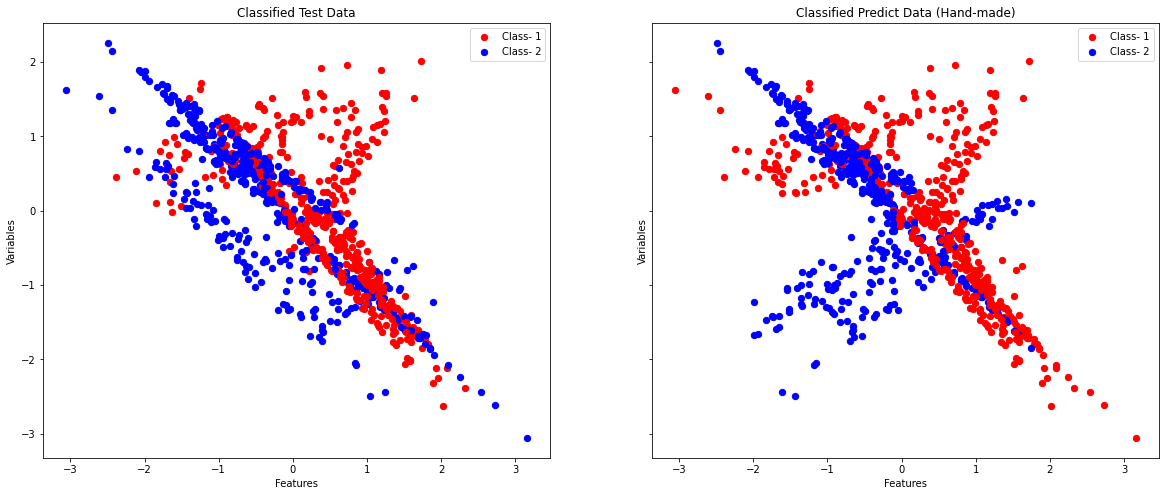

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax1.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax1.scatter(X_test[y_test == 0, 1], X_test[y_test == 0, 2], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 2], s = 40, c = 'b')

ax1.scatter(X_test[y_test == 0, 2], X_test[y_test == 0, 3], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 2], X_test[y_test == 1, 3], s = 40, c = 'b')

ax1.legend()
ax1.set_xlabel('Features')
ax1.set_ylabel('Variables')
ax1.set_title('Classified Test Data')

ax2.scatter(X_test[yhat_mine == 0, 0], X_test[yhat_mine == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax2.scatter(X_test[yhat_mine == 1, 0], X_test[yhat_mine == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax2.scatter(X_test[yhat_mine == 0, 1], X_test[yhat_mine == 0, 2], s = 40, c ='r')
ax2.scatter(X_test[yhat_mine == 1, 0], X_test[yhat_mine == 1, 2], s = 40, c = 'b')

ax2.scatter(X_test[yhat_mine == 0, 2], X_test[yhat_mine == 0, 3], s = 40, c ='r')
ax2.scatter(X_test[yhat_mine == 1, 2], X_test[yhat_mine == 1, 3], s = 40, c = 'b')

ax2.legend()
ax2.set_xlabel('Features')
ax2.set_ylabel('Variables')
ax2.set_title('Classified Predict Data (Hand-made)')

#### Skelarn Results

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
model=GaussianNB()

In [24]:
%time model.fit(X_train,y_train)

CPU times: user 3.45 ms, sys: 1.94 ms, total: 5.39 ms
Wall time: 3.6 ms


GaussianNB()

In [25]:
yhat_sklearn=model.predict(X_test)

In [26]:
accuracy_score(y_test,yhat_sklearn)

0.8757575757575757

In [27]:
jaccard_score(y_test,yhat_sklearn)

0.7722222222222223

In [28]:
f1_score(y_test,yhat_sklearn)

0.871473354231975

In [29]:
cm_sklearn=confusion_matrix(y_test,yhat_sklearn)

#### Plots Sklearn

Text(0.5, 1.0, 'Confusion Matrix Sklearn')

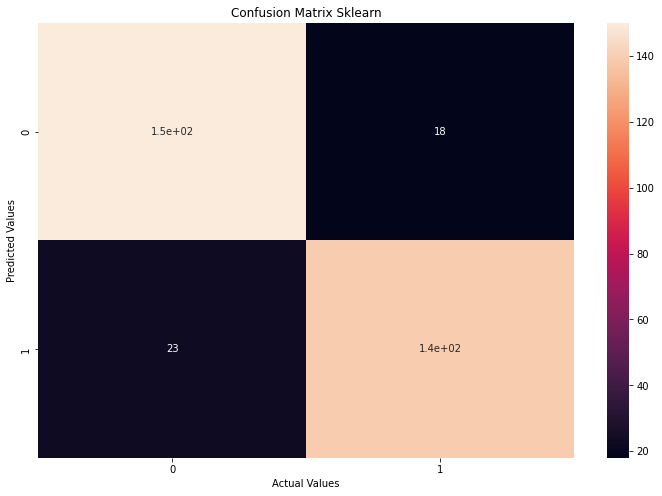

In [30]:
fig=plt.figure(figsize=(12,8))
fig=sns.heatmap(cm_mine,annot=True)
fig.set(xlabel='Actual Values', ylabel='Predicted Values')
plt.title('Confusion Matrix Sklearn')

Text(0.5, 1.0, 'Classified Predict Data (Sklearn)')

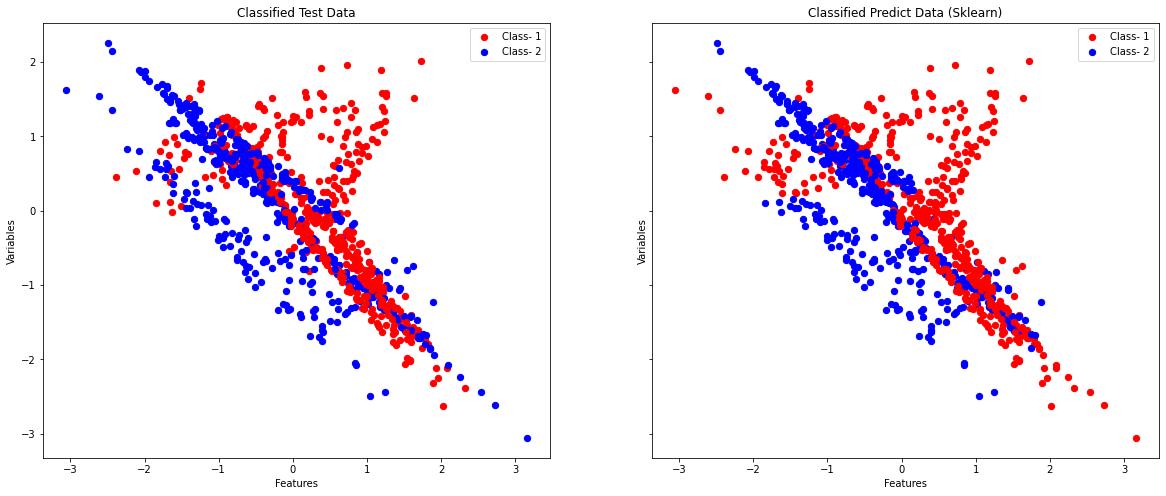

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax1.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax1.scatter(X_test[y_test == 0, 1], X_test[y_test == 0, 2], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 2], s = 40, c = 'b')

ax1.scatter(X_test[y_test == 0, 2], X_test[y_test == 0, 3], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 2], X_test[y_test == 1, 3], s = 40, c = 'b')

ax1.legend()
ax1.set_xlabel('Features')
ax1.set_ylabel('Variables')
ax1.set_title('Classified Test Data')

ax2.scatter(X_test[yhat_sklearn== 0, 0], X_test[yhat_sklearn == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax2.scatter(X_test[yhat_sklearn == 1, 0], X_test[yhat_sklearn == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax2.scatter(X_test[yhat_sklearn == 0, 1], X_test[yhat_sklearn == 0, 2], s = 40, c ='r')
ax2.scatter(X_test[yhat_sklearn == 1, 1], X_test[yhat_sklearn == 1, 2], s = 40, c = 'b')

ax2.scatter(X_test[yhat_sklearn == 0, 2], X_test[yhat_sklearn == 0, 3], s = 40, c ='r')
ax2.scatter(X_test[yhat_sklearn == 1, 2], X_test[yhat_sklearn == 1, 3], s = 40, c = 'b')

ax2.legend()
ax2.set_xlabel('Features')
ax2.set_ylabel('Variables')
ax2.set_title('Classified Predict Data (Sklearn)')